In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras import optimizers
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from os import makedirs
from keras.callbacks import ModelCheckpoint
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, InputLayer, BatchNormalization
from keras.models import Sequential
from keras import optimizers

2023-10-27 21:50:58.305221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 21:50:58.305252: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 21:50:58.306580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 21:50:58.395153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 21:50:59.511672: W tensorflow/compiler/

In [2]:
        model = Sequential()

        # convolutional layer
        model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))

        # convolutional layer
        model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))


        model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))


        model.add(Conv2D(175, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))


        model.add(Conv2D(225, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
#         model.add(Dropout(0.25))

        # flatten output of conv
        model.add(Flatten())

        # hidden layer
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(5, activation='softmax'))

2023-10-27 21:51:01.494024: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-27 21:51:01.601057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-27 21:51:01.601331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range = 10, height_shift_range = 0.1, width_shift_range=0.1, zoom_range = 0.1)
train_images = train_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/train/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32)
val_datagen = ImageDataGenerator(rescale=1.0/255)
validation_images = val_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/validation/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32)

Found 24573 images belonging to 5 classes.
Found 3516 images belonging to 5 classes.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 125)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 175)         1

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
STEP_SIZE_TRAIN = train_images.n//train_images.batch_size
STEP_SIZE_VALID = validation_images.n//validation_images.batch_size
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

filepath='cnn_models/cnn_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, mode='max', verbose=1)

# Create a list of callbacks, including ModelCheckpoint and EarlyStopping
callbacks_list = [checkpoint, early_stopping]

# Start training
history = model.fit_generator(generator=train_images,
                               steps_per_epoch=STEP_SIZE_TRAIN,
                               validation_data=validation_images,
                               validation_steps=STEP_SIZE_VALID,
                               callbacks=callbacks_list,
                               epochs=100)

/tmp/ipykernel_7712/76013245.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_images,


Epoch 1/100


2023-10-27 21:51:03.887689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-27 21:51:05.247262: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2278039e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 21:51:05.247290: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2023-10-27 21:51:05.255922: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 21:51:05.374131: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


767/767 [==============================] - ETA: 0s - loss: 0.8852 - accuracy: 0.7342
Epoch 1: val_accuracy improved from -inf to 0.73567, saving model to cnn_models/cnn_model.h5


/home/mrroy/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2023-10-27 21:54:02.624666: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-10-27 21:54:02.743354: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-10-27 21:54:02.789328: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.


767/767 [==============================] - 180s 229ms/step - loss: 0.8852 - accuracy: 0.7342 - val_loss: 0.8749 - val_accuracy: 0.7357
Epoch 2/100
767/767 [==============================] - ETA: 0s - loss: 0.8748 - accuracy: 0.7349
Epoch 2: val_accuracy did not improve from 0.73567
767/767 [==============================] - 176s 230ms/step - loss: 0.8748 - accuracy: 0.7349 - val_loss: 0.8707 - val_accuracy: 0.7342
Epoch 3/100
767/767 [==============================] - ETA: 0s - loss: 0.8735 - accuracy: 0.7351
Epoch 3: val_accuracy did not improve from 0.73567
767/767 [==============================] - 172s 224ms/step - loss: 0.8735 - accuracy: 0.7351 - val_loss: 0.8737 - val_accuracy: 0.7345
Epoch 4/100
767/767 [==============================] - ETA: 0s - loss: 0.8708 - accuracy: 0.7352
Epoch 4: val_accuracy did not improve from 0.73567
767/767 [==============================] - 172s 225ms/step - loss: 0.8708 - accuracy: 0.7352 - val_loss: 0.8709 - val_accuracy: 0.7342
Epoch 5/100
767/

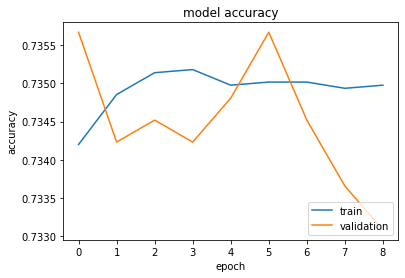

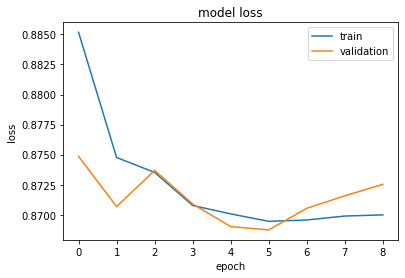

In [6]:
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    
    plt.show()

In [7]:
from keras.models import load_model
m = load_model('cnn_models/cnn_model.h5')

2023-10-27 22:17:14.907518: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-10-27 22:17:15.104255: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.


In [8]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_images = test_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/test/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32)
p = m.evaluate_generator(test_images, verbose=1, steps=test_images.n//test_images.batch_size)
print(p)

Found 7019 images belonging to 5 classes.


/tmp/ipykernel_7712/2302545426.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  p = m.evaluate_generator(test_images, verbose=1, steps=test_images.n//test_images.batch_size)


219/219 [==============================] - 41s 186ms/step - loss: 0.8748 - accuracy: 0.7352
[0.8747986555099487, 0.7351598143577576]


In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_images = test_datagen.flow_from_directory('/home/mrroy/Dataset/CLASS/test/',  color_mode = 'grayscale', target_size = (28, 28), batch_size = 32, shuffle = False)

Found 7019 images belonging to 5 classes.


In [10]:
y_pred = m.predict_generator(generator = test_images, verbose = 1)
y_pred = y_pred.argmax(axis=-1)

/tmp/ipykernel_7712/404438757.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = m.predict_generator(generator = test_images, verbose = 1)


220/220 [==============================] - 38s 174ms/step


In [11]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, accuracy_score, f1_score, recall_score
print(classification_report(test_images.classes[test_images.index_array], y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      5160
           1       0.00      0.00      0.00       487
           2       0.00      0.00      0.00      1057
           3       0.00      0.00      0.00       174
           4       0.00      0.00      0.00       141

    accuracy                           0.74      7019
   macro avg       0.15      0.20      0.17      7019
weighted avg       0.54      0.74      0.62      7019



/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print('precision')
p1 = precision_score(test_images.classes[test_images.index_array], y_pred, average = 'weighted')
print(p1*100)
print('recall')
r1 = recall_score(test_images.classes[test_images.index_array], y_pred, average = 'weighted')
print(r1*100)
print('f1')
f11 = f1_score(test_images.classes[test_images.index_array], y_pred, average = 'weighted')
print(f11*100)
print('accuracy')
a1 = accuracy_score(test_images.classes[test_images.index_array], y_pred)
print(a1*100)

precision
54.044178339049644
recall
73.51474569026927
f1
62.29347036075039
accuracy
73.51474569026927


/home/mrroy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
